## Chap 6 Deep Feedforward Networks

Deep feedforward networks, also often called __feedforward neural networks__, or __multilayer perceptrons__ (MLPs), are the quintessential deep learning models. The goal of a feedforward network is to approximate some function $f^{*}$.

These models are called __feedforward__ because information flows through the function being evaluated from x, through the intermediate computations used to define f, and finally to the output y. 

Feedforward neural networks are called __networks__ because they are typically represented by composing together many different functions.

One way to understand feedforward networks is to begin with linear models (logistic regression, linear regression) and consider how to overcome their limitations. 

- Pros: Efficient (Solved by closed form or convex optimization)
- Cons: Model capacity limited to linear function 

To extend linear models to represent nonlinear functions of x, we can apply the linear model not to x itself but to a transformed input φ(x), where φ is a nonlinear transformation.

Options for the mapping φ.
- Very generic φ
   - If φ(x) is of high enough dimension, we can always have enough capacity to fit the training set, but __generalization__ to the test set often remains __poor__.
   - Very generic feature mappings are usually based only on the principle of local smoothness and __do not encode enough prior information__ to solve advanced problems.

- Manually engineer φ
    - This approach requires decades of __human effort__ for each separate task, with practitioners specializing in different domains such as speech recognition or computer vision, and with __little transfer between domains__.
    
- Deep learning's approach to learn φ
    - This approach is the only one of the three that __gives up on the convexity__ of the training problem, but the benefits outweigh the harms.
    - This approach can capture the benefit of the first approach by being __highly generic__ by using a very broad family φ(x;θ)
    - Human practitioners can encode their knowledge to help generalization by __designing families φ(x; θ)__ that they expect will perform well.
    - The advantage is that the human designer only needs to find the right general function family rather than finding precisely the right function.

### 6.1 Example: Learning XOR
The XOR function provides the target function $y = f^{∗} (x)$ that we want to learn. Our model provides a function $y = f(x;\theta)$ and our learning algorithm will adapt the parameters $\theta$ to make $f$ as similar as possible to $f^{*}$

__Training Data__ 
$$
\mathbb{X} = 
    \begin{bmatrix}
        0 & 0 & 1 & 1\\
        0 & 1 & 0 & 1\\
    \end{bmatrix}, 
\mathbb{Y} =
    \begin{bmatrix}
        0 & 1 & 1 & 0\\
    \end{bmatrix} 
$$

__Loss Function__ 
$$\mathbb{J}(\theta) = \frac{1}{4} \sum_{x \in \mathbb{X}} (f^{*}(x)-f(x;\theta))^2$$

__Linear Model__
$$f(x;\omega,b) = x^T\omega+b$$

__Model 1: Linear Regression__

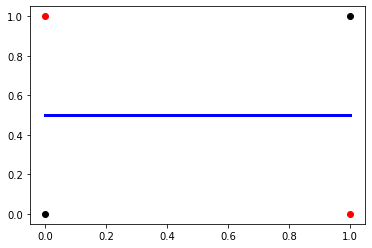

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# XOR logic 
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0,1,1,0])

# Train linear regression
reg = LinearRegression().fit(X, Y)

# Make prediction 
Y_pred = reg.predict(X)

# Plot
plt.scatter(X[1:3,:1], X[1:3,1:],  color='red')
plt.scatter(X[::3,:1], X[::3,1:],  color='black')
plt.plot(X, Y_pred, color='blue', linewidth=3)
plt.show()

__Model 2: Nonlinear Function (ReLU)__
\begin{align}
    h &= f^{(1)}(x;W,c), y = f^{(2)}(h;w,b) \\
    h &= g(W^Tx+c), y = w^Th+b \\
    g &(z) = max\{0,z\} \\ 
    f &(x;W,c,w,b) = w^T max\{0, W^Tx+c\}+b \\
\end{align}

Training Data 
$$
\mathbb{X} = 
    \begin{bmatrix}
        0 & 0 & 1 & 1 \\
        0 & 1 & 0 & 1 \\
    \end{bmatrix}, 
\mathbb{Y} =
    \begin{bmatrix}
        0 & 1 & 1 & 0 \\
    \end{bmatrix} 
$$
Train
$$
W = \begin{bmatrix} 
        1 & 1 \\
        1 & 1 \\
    \end{bmatrix} 
c = \begin{bmatrix} 
        0  \\
        -1 \\
    \end{bmatrix} 
w = \begin{bmatrix} 
        1  \\
        -2 \\
    \end{bmatrix} 
b = \begin{bmatrix} 
    0 & 0 & 0 & 0 \\
\end{bmatrix} 
    \\
WX = 
    \begin{bmatrix} 
        0 & 1 & 1 & 2 \\
        0 & 1 & 1 & 2 \\
    \end{bmatrix} \\
WX + c = 
    \begin{bmatrix} 
        0  & 1 & 1 & 2 \\
        -1 & 0 & 0 & 1 \\
    \end{bmatrix} \\
h = 
    \begin{bmatrix} 
        0  & 1 & 1 & 2 \\
        0  & 0 & 0 & 1 \\
    \end{bmatrix} \\
w^Th + b= 
\begin{bmatrix} 
    0  & 1 & 1 & 0 \\
\end{bmatrix} \\
f (x;W,c,w,b) = 
\begin{bmatrix} 
    0  & 1 & 1 & 0 \\
\end{bmatrix} = \mathbb{Y}\\
$$

### 6.2 Gradient-Based Learning
The largest difference between the __linear models__ we have seen so far and __neural networks__ is that the __nonlinearity__ of a neural network causes most interesting loss functions to become __non-convex.__

Neural networks are usually trained by using iterative, gradient-based optimizers that merely drive the cost function to a very low value 

Stochastic gradient descent applied to non-convex loss functions has no such convergence guarantee, and is __sensitive to the values of the initial parameters__

#### 6.2.1 Cost Functions
Our parametric model defines a distribution $p(y|x;\theta)$ and we simply use the principle of maximum likelihood. This means we use the __cross-entropy__ between the training data and the model’s predictions as the cost function.

The total cost function used to train a neural network will often combine one of the primary cost functions described here with a __regularization term.__

##### 6.2.1.1 Learning Conditional Distributions with Maximum Likelihood

Most modern neural networks are trained using __maximum likelihood__. This means that the cost function is simply the __negative log-likelihood__, equivalently described as the __cross-entropy__ between the training data and the model distribution.

$$J(\theta) = - \mathbb{E}_{x,y \sim \hat p_{data}} \log p_{model}(y|x)$$

The specific form of the cost function changes from model to model, depending on the specific form of $\log p_{model}$

An advantage of this approach of deriving the cost function from __maximum likelihood__ is that it removes the burden of designing cost functions for each model. Specifying a model p(y | x) automatically determines a cost function log p(y | x).

One recurring theme throughout neural network design is that the __gradient of the cost function__ must be __large and predictable__ enough to serve as a good guide for the learning algorithm. 

Functions that saturate (become very flat) undermine this objective because they make the gradient become very small. This happens because the activation functions used to produce the output of the hidden units or the output units __saturate__.

The negative log-likelihood helps to avoid this problem for many models. Many output units involve an exp function that can saturate when its argument is very negative. The log function in the negative log-likelihood cost function undoes the exp of some output units.

#### 6.2.1.2 Learning Conditional Statistics
skip

### 6.2.2 Output Units
The choice of __cost function__ is __tightly coupled__ with the choice of __output unit__. We simply use the __cross-entropy__ between the data distribution and the model distribution. The choice of how to represent the output then determines the form of the cross-entropy function.

Any kind of neural network unit that may be used as an output can also be used as a hidden unit.

#### 6.2.2.1 Linear Units for Gaussian Output Distributions
One simple kind of output unit is an output unit based on an affine transformation with __no nonlinearity__. These are often just called linear units. 

Because linear units do not saturate, they pose little difficulty for gradient-based optimization algorithms and may be used with a wide variety of optimization algorithms.

#### 6.2.2.2 Sigmoid Units for Bernoulli Output Distributions
Many tasks require predicting the value of a __binary variable y__. __Classification problems__ with two classes can be cast in this form.

A Bernoulli distribution is defined by just a single number. The neural net needs to predict only P(y = 1 | x).

A sigmoid output unit is defined by $$\hat y = \sigma(w^Th+b)$$

First, it uses a linear layer to compute $z = w^Th + b$. Next, it uses the __sigmoid__ activation function to __convert z into a probability.__ 

Let P(y) be normalized probability distribution, and y is a binary variable y=0 or y=1

Let P(y=1) then $$P(y) = \frac{e^z}{1+e^z} = \sigma(z)$$

Let P(y=0) then $$P(y) = \frac{1}{1+e^z} = \sigma(-z)$$

Combined $$P(y) = \sigma((2y-1)z)$$

The detailed derivation can be found 
- https://towardsdatascience.com/understanding-the-motivation-of-sigmoid-output-units-e2c560d4b2c4
- https://stats.stackexchange.com/questions/269575/motivating-sigmoid-output-units-in-neural-networks-starting-with-unnormalized-lo/361267#361267 

Because the __cost function__ used with __maximum likelihood__ is −log P(y|x), the log in the cost function undoes the exp of the sigmoid. Without this effect, the saturation of the sigmoid could prevent gradient-based learning from making good progress.

\begin{align}
    J(\theta) &= - \log P(y|x) \\
              &= - \log \sigma((2y-1)z) \\
              &= \zeta((1-2y)z) \\
\end{align}

By rewriting the loss in terms of the softplus function, we can see that it __saturates__ only when (1 − 2y)z is very __negative. __

Saturation thus occurs only when the model already has the right answer when y = 1 and z is very positive, or y = 0 and z is very negative. 

When z has the wrong sign, the argument to the softplus function, (1−2y)z, may be simplified to |z|. As |z| becomes large while z has the wrong sign, the softplus function asymptotes toward simply returning its argument |z|.

$$
J(\theta) = \zeta((1-2y)z) \approx |z| \\
\frac{\partial J(\theta)}{\partial z} \approx sign(z) \\
$$

so, in case of extremely incorrect z, the softplus function __does not shrink the gradient at all.__ This property is very useful because it means that gradient-based learning can act to quickly correct a mistaken z.

When we use other loss functions, such as mean squared error, the loss can saturate anytime σ(z) saturates. For this reason, maximum likelihood is almost always the preferred approach to training sigmoid
output units.

##### 6.2.2.3 Softmax Units for Multinoulli Output Distributions

Any time we wish to represent a probability distribution over a discrete variable with n possible values, we may use the __softmax function__.

In the case of binary variables, we wished to produce a single number 

$$\hat y = P (y = 1 | x)$$ 

Given input x, $\hat y$ is an estimation of random variable y equals to 1. 

Because this number needed to lie between 0 and 1, and because we wanted the logarithm of the number to be well-behaved for gradient-based optimization of the log-likelihood. (In case the likelihood underflows to zero then the negative likelihood yields __negative infinity__)

We chose to instead predict a number $$z = \log \tilde P(y = 1 | x)$$

To generalize to the case of a discrete variable with n values, we now need to produce a vector $\hat y_i$, with $$\hat y_i = P(y = i|x)$$

We require not only that each element of $\hat y$ be between 0 and 1, but also that the entire vector sums to 1 so that i
it represents a valid probability distribution.

First, a linear layer predicts __unnormalized__ log probabilities: $$z_i = \log \tilde P(y=i|x)$$

The softmax function can then exponentiate and normalize z to obtain the desired $\hat y$ 
$$\mathbb{softmax}(z)_i = \frac{exp(z_i)}{\sum_j exp(z_j)}$$

The use of the exp function works very well when training the softmax to output a target value y using maximum log-likelihood. We wish to maximize $$\log P(y = i;z) = \log  \mathbb{softmax(z)_i}$$

Defining the softmax in terms of exp is natural because the log in the log-likelihood can undo the exp of the softmax:
$$\log \mathbb{softmax}(z)_i = z_i - \log \sum_j exp(z_j)$$

When maximizing the log-likelihood, the first term encourages $z_i$ to be __pushed up__, while the second term encourages all of z to be __pushed down__.

The first term shows that the input $z_i$ always has a direct contribution to the cost function. Because this term cannot saturate, we know that learning can proceed, even if the contribution of $z_i$ to the second term becomes very small.

Observed that the second term $\log \sum_j exp(z_j)$ can be roughly approximately by $\max_j z_j$ This approximation is based on the idea that $exp(z_k)$ is insignificant for any $z_k$ that is noticeably less than $\max_j z_j$

e.g. $\log \sum (1 + 10 + 100 + 10000) = \log (10111) \approx \log 10^4 = 4$

The intuition we can gain from this approximation is that the __negative log-likelihood cost function always strongly penalizes the most active incorrect prediction__

\begin{align}
    -\log \mathbb{softmax}(z)_i &= - z_i + \log \sum_j exp(z_j) \\
    & \approx - z_i + max_j z_j \\ 
\end{align}

If the correct answer already has the largest input to the softmax, then the $−z_i$ term and the $\log \sum_{j} exp(z_j) \approx max_j z_j = z_i$ terms will roughly cancel.

Many objective functions other than the log-likelihood do not work as well with the softmax function. Specifically, objective functions that do NOT use a log to undo the exp of the softmax fail to learn when the argument to the exp becomes
very negative, causing the gradient to vanish.

In particular, squared error is a poor loss function for softmax units, and can fail to train the model to change its output, even when the model makes highly confident incorrect predictions. 

Like the sigmoid, the softmax activation can saturate. In the case of the softmax, there are multiple output values. These output values can saturate when the differences between input values become extreme. When the softmax saturates, many cost functions based on the softmax also saturate, unless they are able to invert the saturating activating function.

Observe that the softmax output is invariant to adding the same scalar to all of its inputs: $$\mathbb{softmax}(z) = \mathbb{softmax}(z+c)$$

A numerically stable variant of the softmax: $$\mathbb{softmax}(z) = \mathbb{softmax}(z - \max_i z_i)$$

The reformulated version allows us to evaluate softmax with only small numerical errors even when z contains extremely large or extremely negative numbers. We see that the softmax function is driven by the amount that its arguments deviate from $\max_i z_i$

Output $\mathbb{softmax}(z)_i$ __saturates to 1__ when the corresponding input is maximal ($z_i = max_i z_i$ ) and $z_i$ is much greater than all of the other inputs. The output $\mathbb{softmax}(z)_i$ can also __saturate to 0__ when $z_i$ is not maximal and the maximum is much greater. 

e.g. $z_1 = 1,z_2=10,z_3=100,z_4=10000$ 
$$\mathbb{softmax}(z_1) = \frac{z_1}{\sum_j z_j} = \frac{1}{10111} \approx 0$$
$$\mathbb{softmax}(z_4) = \frac{z_4}{\sum_j z_j} = \frac{10000}{10111} \approx 1$$

From a neuroscientific point of view, it is interesting to think of the softmax as a way to create a form of competition between the units that participate in it: the softmax outputs always sum to 1 so an increase in the value of one unit necessarily corresponds to a decrease in the value of others. 

The name “softmax” can be somewhat confusing. The function is more closely related to the argmax function than the max function. The term “soft” derives from the fact that the softmax function is continuous and differentiable. The arg max function, with its result represented as a one-hot vector, is not continuous or differentiable. The softmax function thus provides a “softened” version of the argmax.

##### 6.2.2.4 Other Output Types
Neural networks can generalize to almost any kind of output layer that we wish.

If we define a conditional distribution p(y | x; θ), the principle of maximum likelihood suggests we use $− \log p(y|x;\theta)$ as our cost function.

... 

## 6.3 Hidden Units
How to choose the type of hidden unit to use in the hidden layers of the model ? The design of hidden units is an extremely active area of research and does not yet have many definitive guiding theoretical principles.

Rectified linear units are an excellent default choice of hidden unit. .. The design process consists of trial and error, intuiting that a kind of hidden unit may work well, and then training a network with that kind of hidden unit and evaluating its performance on a validation set.

Some of the hidden units included in this list are not actually differentiable at all input points. This may seem like it invalidates g for use with a gradient-based learning algorithm. In practice, gradient descent still performs well enough for these models to be used for machine learning tasks. This is in part because neural network training algorithms do not usually arrive at a local minimum of the cost function, but instead merely reduce its value significantl. 

Hidden units that are not differentiable are usually non-differentiable at only a small number of points.

Software implementations of neural network training usually return one of the one-sided derivatives rather than reporting that the derivative is undefined or raising an error.

Unless indicated otherwise, most hidden units can be described as accepting a vector of inputs x, computing an affine transformation $z = W^Tx + b$, and then applying an element-wise nonlinear function g(z).



### 6.3.1 Rectified Linear Units and Their Generalizations
$$g(z) = \max \{0, z\}$$

Rectified linear units are easy to optimize because they are so similar to linear units.

The __gradients__ are not only __large__ but also __consistent.__ The __second derivative__ of the rectifying operation is __0__ almost everywhere, and the derivative of the rectifying operation is 1 everywhere that the unit is active.

When initializing the parameters of the affine transformation, it can be a good practice to __set all elements of b to a small, positive value, such as 0.1.__ This makes it very likely that the rectified linear units will be __initially active__ for most inputs in the training set and allow the derivatives to pass through.

One drawback to rectified linear units is that they cannot learn via gradient-based methods on examples for which their activation is zero.

Rectified linear units and all of these generalizations of them are based on the principle that models are easier to optimize if their behavior is closer to linear.

### 6.3.2 Logistic Sigmoid and Hyperbolic Tangent
Logistic sigmoid activation function $$g(z) = \sigma(z)$$

Hyperbolic tangent activation function $$g(z) = tanh(z)$$

These activation functions are closely related because $tanh(z) = 2 \sigma (2z) − 1$

They saturate to a high value when z is very positive, saturate to a low value when z is very negative, and are only strongly sensitive to their input when z is near 0.

Hyperbolic tangent activation function resembles the identity function more closely, in the sense that tanh(0) = 0 while $ \sigma (0) = \frac{1}{2}$. Because __tanh is similar to the identity function near 0__, training a deep neural network $\hat y = w^T tanh(U ^T tanh(V^Tx))$ resembles training a linear model $\hat y = w^TU^TV^Tx$ so long as the activations of the network can be kept small. This makes training the tanh network easier.

### 6.3.3 Other Hidden Units
In general, a wide variety of differentiable functions as hidden units perform perfectly well. Many unpublished activation functions perform just as well as the popular ones. 

To provide a concrete example, the authors tested a feedforward network using cos function as hidden unit on the MNIST dataset and obtained an error rate of less than 1%, which is competitive with results obtained using more conventional activation functions.

One possibility is to not have an activation g (z) at all. If every layer of the neural network consists of only linear transformations, then the network as a whole will be linear. However, it is acceptable for some layers of the neural network to be purely linear.

Linear hidden units thus offer an effective way of reducing the number of parameters in a network.

Softmax units are another kind of unit that is usually used as an output but may sometimes be used as a hidden unit. Softmax units naturally represent a probability distribution over a discrete variable with k possible values, so they may be used as a kind of switch.

## 6.4 Architecture Design
The word __architecture__ refers to the overall structure of the network: how many units it should have and how these units should be connected to each other.

In these chain-based architectures, the main architectural considerations are to choose the __depth__ of the network and the __width__ of each layer. 

__Deeper networks__ often are able to use far __fewer units per layer__ and far __fewer parameters__ and often generalize to the test set, but are also often harder to optimize.

### 6.4.1 Universal Approximation Properties and Depth
Feedforward networks with hidden layers provide a universal approxi- mation framework.

Specifically, the __universal approximation theorem__ states that a feedforward network with a linear output layer and at least one hidden layer with any “squashing” activation function (such as the logistic sigmoid activation function) can approximate any __Borel measurable function__ from one finite-dimensional space to another with any desired non-zero amount of error, provided that the network is given enough hidden units.

The concept of __Borel measurability__ is beyond the scope of this book; for our purposes it suffices to say that any continuous function on a closed and bounded subset of $R^n$ is Borel measurable and therefore may be approximated by a neural network.

The __universal approximation theorem__ means that regardless of what function we are trying to learn, we know that a large MLP will be able to __represent__ this function. However, we are not guaranteed that the training algorithm will be able to __learn__ that function. 

Learning can fail for two different reasons. First, the optimization algorithm used for training may not be able to find the value of the parameters that corresponds to the desired function. Second, the training algorithm might choose the wrong function due to overfitting.

In summary, a feedforward network with a single layer is sufficient to represent any function, but the layer may be infeasibly large and may fail to learn and generalize correctly. In many circumstances, using deeper models can reduce the number of units required to represent the desired function and can reduce the amount of generalization error.

Showed that functions representable with a deep rectifier net can require an exponential number of hidden units with a shallow (one hidden layer) network.

Figure 6.5 illustrates how a network with __absolute value rectification__ creates mirror images of the function computed on top of some hidden unit, with respect to the input of that hidden unit. Each hidden unit specifies __where to fold the input space__ in order to create __mirror responses__ (on both sides of the absolute value nonlinearity). By composing these folding operations, we obtain an __exponentially large__ number of piecewise linear regions which can capture all kinds of regular (e.g., repeating) patterns.

![Geometric explanation](ref/Fig6.5.png)

An intuitive, geometric explanation of the __exponential advantage of deeper rectifier networks__ formally by Montufar et al. (2014).

__(Left)__ An absolute value rectification unit has the same output for every pair of mirror points in its input. The mirror axis of symmetry is given by the hyperplane defined by the weights and bias of the unit. A function computed on top of that unit (the green decision surface) will be a mirror image of a simpler pattern across that axis of symmetry.

__(Center)__ The function can be obtained by folding the space around the axis of symmetry. 

__(Right)__ Another repeating pattern can be folded on top of the first (by another downstream unit) to obtain another symmetry (which is now repeated four times, with two hidden layers). 

We may also want to choose a deep model for statistical reasons. Any time we choose a specific machine learning algorithm, we are __implicitly stating some set of prior beliefs__ we have about what kind of function the algorithm should learn. (e.g. Image recognition solved by CNN, Speech recognition solved by LSTM) Choosing a __deep model__ encodes a __very general belief__ that the function we want to learn should involve __composition of several simpler functions.__

Empirically, greater depth does seem to result in better generalization for a wide variety of tasks. Using __deep architectures__ does indeed __express a useful prior__ over the space of functions the model learns.

![Deeper Network Better Results](ref/Fig6.6.png)

![Layers and Results](ref/Fig6.7.png)

Deeper models tend to perform better. This is NOT merely because the model is larger. This experiment from Goodfellow et al. (2014d) shows that __increasing the number of parameters in layers of convolutional networks without increasing their depth is not nearly as effective at increasing test set performance.__ We observe that shallow models in this context overfit at around 20 million parameters while deep ones can benefit from having over 60 million. 

This suggests that using a deep model expresses a useful preference over the space of functions the model can learn. Specifically, it expresses a belief that __the function should consist of many simpler functions composed together.__ This could result either in learning a representation that is composed in turn of simpler representations or in learning a program with sequentially dependent steps.

### 6.4.2 Other Architectural Considerations
Another key consideration of architecture design is exactly how to connect a pair of layers to each other. 

Many specialized networks in the chapters ahead have __fewer connections__, so that each unit in the input layer is connected to only a small subset of units in the output layer. These strategies for reducing the number of connections reduce the number of parameters and the amount of computation required to evaluate the network, but are often __highly problem-dependent.__

## 6.5 Back-Propagation and Other Differentiation Algorithms

### 6.5.1 Computational Graphs
Here, we use each __node__ in the graph to indicate a __variable.__ The variable may be a __scalar, vector, matrix, tensor__, or even a variable of another type. An __operation__ is a simple function of one or more variables. Functions more complicated than the operations in this set may be described by composing many operations together. Without loss of generality, we define an operation to return only a single output variable. This does not lose generality because the output variable can have multiple entries, such as a vector.

### 6.5.2 Chain Rule of Calculus
Back-propagation is an algorithm that computes the chain rule, with a specific order of operations that is highly efficient.

Suppose that $x \in R^m, y \in R^n$, g maps from $R^m$ to $R^n$, and f maps from $R^n$ to $R$. If y = g(x) and z = f(y), then $$\frac{\partial z}{\partial x_i} = \sum_j \frac{\partial z}{\partial y_i} \frac{\partial y_i}{\partial x_i}$$

In vector notation, this may be equivalently written as $$\nabla x^z = (\frac{\partial y}{\partial x})^T \nabla y^z$$
where $\frac{\partial y}{\partial x}$ is the n x m __Jacobian__ matrix of g

The back-propagation algorithm consists of performing such a Jacobian-gradient product for each operation in the graph.

### 6.5.3 Recursively Applying the Chain Rule to Obtain Backprop 
Many subexpressions may be repeated several times within the overall expression for the gradient. Any procedure that computes the gradient will need to choose whether to store these subexpressions or to recompute them several times.

For complicated graphs, there can be exponentially many of these wasted computations, making a naive implementation of the chain rule infeasible.

### 6.5.4 Back-Propagation Computation in Fully-Connected MLP

### 6.5.5 Symbol-to-Symbol Derivatives
__Algebraic expressions__ and __computational graphs__ both operate on __symbols__, or __variables__ that do not have specific values. These algebraic and graph-based representations are called __symbolic representations.__

Some approaches to back-propagation take a __computational graph__ and a set of __numerical values for the inputs__ to the graph, then return a set of numerical values describing the gradient at those input values. We call this approach “symbol- to-number” differentiation. i.e. Torch, Caffe

Another approach is to take a __computational graph__ and __add additional nodes__ to the graph that provide a symbolic description of the desired derivatives. The primary advantage of this approach is that the derivatives are described in the same language as the original expression. Because the derivatives are just another computational graph, it is possible to run back-propagation again, differentiating the derivatives in order to obtain __higher derivatives.__